# logistic regression

#### importing required libraries

In [2]:
import numpy as n
import pandas as p
import matplotlib.pyplot as plt


#### reading data from  csv file

In [3]:
df=p.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


#### data preprocessing

In [4]:
df1=df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
# df1['churn']=p.to_numeric(df1['churn'],downcast='integer')
df1['churn']=df1['churn'].astype('int')
df1


C:\Users\hemas\AppData\Local\Temp\ipykernel_4612\1701229906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['churn']=df1['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,1


In [5]:
x=df1[['tenure','age','address','income','ed','employ','equip']].values
y=n.asanyarray(df1['churn'])
x[0:5],y[0:5]

(array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
        [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
        [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
        [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
        [  7.,  35.,  14.,  80.,   2.,  15.,   0.]]),
 array([1, 1, 0, 0, 0]))

#### normalize the  data

In [6]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

#### spliting the   data into   test and train sets

In [7]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=4)
print(train_x.shape,test_x.shape)
print(train_y.shape,test_y.shape)


(160, 7) (40, 7)
(160,) (40,)


##### logistic regression model

In [8]:
from sklearn.linear_model import LogisticRegression
churn_regression=LogisticRegression(C=0.01,solver='liblinear').fit(train_x,train_y)
churn_regression

LogisticRegression(C=0.01, solver='liblinear')

In [9]:
y_predict=churn_regression.predict(test_x)
y_predict_prob=churn_regression.predict_proba(test_x)

y_predict[0:10],y_predict_prob[0:10]

(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([[0.54132919, 0.45867081],
        [0.60593357, 0.39406643],
        [0.56277713, 0.43722287],
        [0.63432489, 0.36567511],
        [0.56431839, 0.43568161],
        [0.55386646, 0.44613354],
        [0.52237207, 0.47762793],
        [0.60514349, 0.39485651],
        [0.41069572, 0.58930428],
        [0.6333873 , 0.3666127 ]]))

In [10]:
set1=set(test_y)
set2=set(y_predict)

print(set1)

{0, 1}


### evaluation

In [11]:
from sklearn.metrics import jaccard_score
print(jaccard_score(test_y,y_predict,pos_label=0))

0.7058823529411765


In [12]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_y,y_predict,labels=[1,0]))

[[ 6  9]
 [ 1 24]]


c:\Users\hemas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


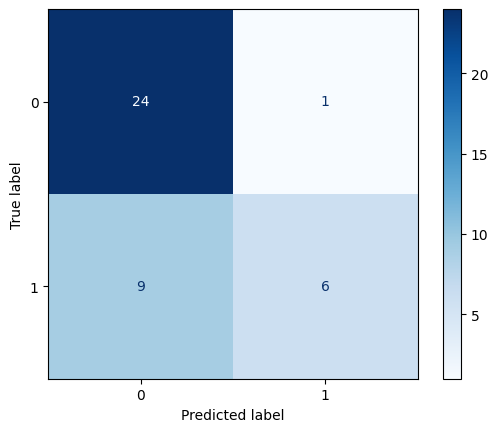

In [14]:
from sklearn.metrics import plot_confusion_matrix
plc=plot_confusion_matrix(churn_regression,test_x,test_y,cmap="Blues")

([-1, 1, 2, 3, 4, 6, 7, 8], [-1, 1, 2, 3, 4, 6, 7, 8])